## Exploration of Titanic Data and Prediction of Survival

This notebook will aim to:
1. Assess and explore relationships between the features in the data
2. Create new features from the available ones both in the train and test data
3. Impute missing values with justifiable ones
4. Explore various algorithms(Classifiers)
5. Select the best algorithm to help predict an unseen data(test)
6. Fine tune hyperparameters to create an optimum model
7. Predict survival from the test data

Progressively, libraries will be imported as required

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Feature Observations

Here we will look at the potential of every feature in feature engineering.

**1. _PassengerID_** - does not have any indication to create a new feature from it.

**2. _Survived_** - is a class feature to be predicted with regard to each passengerin the test data thus no feature can be derived from it.

**3. _Pclass_** - is class feature detailing the ticket classification if 1st, 2nd, or 3rd and no feature can be got from it.

**4. _Name_** - is the string of words unique to each passenger but has potential to create **Title** and **Surname** features.

**4. _Sex_** - is categorical feature detailing passenger orientation if male or female and no feature can be created from it.

**5. _Age_** - is an ordinal unique feature showing amount of years lived and can create an **AgeGroup** categorical feature.

**6. _SibSp_** - is a feature showing the relationship of either Sibling or Spouse and create a **FamilySize** feature together with the **Parch** feature.

**7. _Parch_** - is a feature showing the relationship of either Parent or Child and can create a **FamilySize** feature together with the **SibSp** feature.

**8. _Ticket_** - is a feature detailing the unique ticket number of each passenger and can be explored to create **T_Prefix** feature.

**9. _Fare_** - is a feature showing the amount paid by each passenger and can help create a **FareGroup** feature.

**10. _Cabin_** - is a feature detailing in which cabin the passenger was in or assigned and could create a categorical **CabinClass** feature.

**11. _Embarked_** - is a feature detailing the port of entry by passenger and has no potent to create another feature.

#### Exploration the Relationship of Features to Survival

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
1 - (df_train.count() / len(df_train))

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

**Observations**

1. Age has about 20% missing values which can be imputed with either mean, mode or median
2. Cabin has about 77% missing values and any imputation will give a distribution not representative of actual or close enough.
3. Emabarked has about 0.22% missing values giving an indication of an easy imputation of the missing values
4. All the other features do not have missing values.

In [6]:
df_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Murdlin, Mr. Joseph",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Observation**

1. Minimum age is 0.42 and seems not normal
2. Minimum fare is 0 and also seems not normal

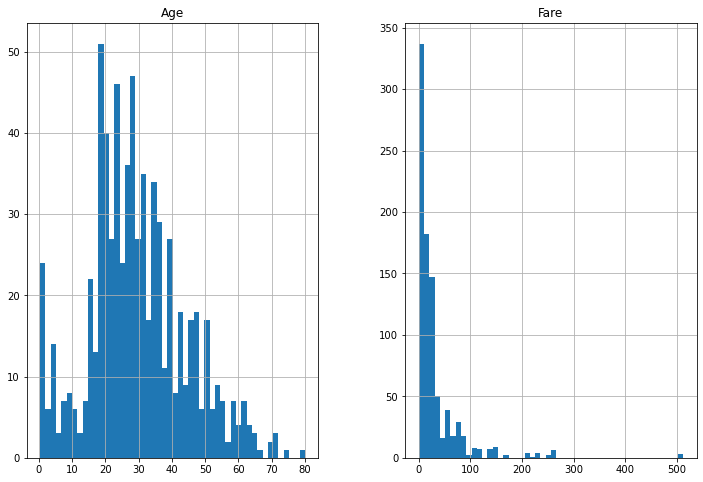

In [7]:
df_train[['Age', 'Fare']].hist(bins=50, figsize=(12, 8))
plt.show()

1. **Sex**

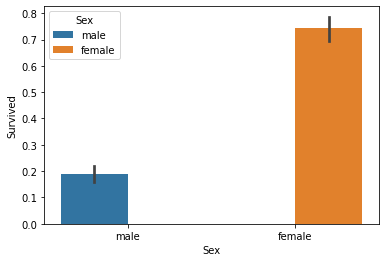

In [8]:
sns.barplot(data=df_train, x='Sex', y='Survived', hue='Sex')
plt.show()

**Observation**

Being a female, there is a likelihood to survive.

2. **Pclass**

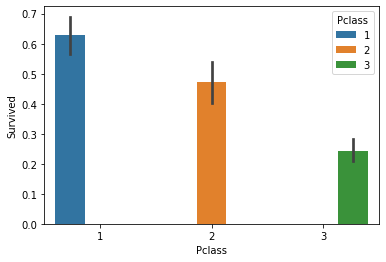

In [9]:
sns.barplot(data=df_train, x= 'Pclass', y='Survived', hue='Pclass')
plt.show()

**Observation**

Passenger class 1 and 2 have a higher likelihood to survive.

3. **Age**

To represent age we will impute missing values and then create a new class feature - **AgeGroup**. For missing values this notebook will adopt the **Mode** to impute.
Classification will be as follows:

0-5 -> Baby

6-15 -> Child

16-35 -> Youth

36-55 -> Adult

55-80 -> Senior

In [10]:
mode = df_train['Age'].mode()
mode

0    24.0
dtype: float64

In [11]:
x= df_test['Age'].mode()
print(x)

0    21.0
1    24.0
dtype: float64


In [12]:
df_train['Age'].fillna(24, inplace=True)
df_test['Age'].fillna(21, inplace=True)

In [13]:
import numpy as np

bins = [0, 6, 16, 36, 55, np.inf]
labels = ['Baby', 'Child', 'Youth', 'Adult', 'Senior']

df_train['AgeGroup'] = pd.cut(df_train['Age'], bins = bins, labels = labels)
df_test['AgeGroup'] = pd.cut(df_test['Age'], bins=bins, labels = labels)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Youth
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Youth
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Youth
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Youth


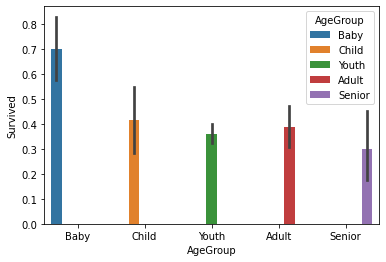

In [14]:
sns.barplot(data=df_train, x='AgeGroup', y='Survived', hue='AgeGroup')
plt.show()

**Observation**

1. Babies have a high likelihood to survive
2. Childrend and Adults have a similar likelihood to survive almost shared with youths
3. Seniors have the lowest survival rate




4. **SibSp**

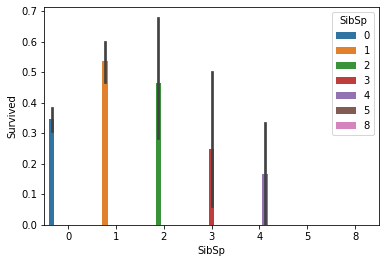

In [15]:
sns.barplot(data=df_train, x='SibSp', y='Survived', hue='SibSp')
plt.show()

**Observations**

There is a high likelihood to survive for a passenger who is alone or with only one extra person.

5. **Parch**

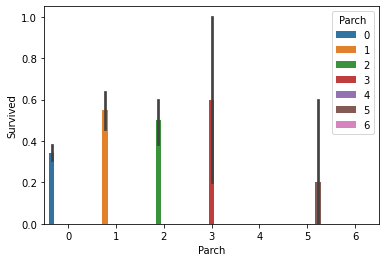

In [16]:
sns.barplot(data=df_train, x='Parch', y='Survived', hue='Parch')
plt.show()

**Observation**

Passengers with parent child relationship were more likely to survive.

6. **Ticket**

In [17]:
891 - int(df_train['Ticket'].unique().shape[0])

210

Only 210 tickets are shared among the passengers giving the impression that less could be got from the Ticket feature.

7. **Fare**

There are fares which are zero which is not factual. This notebook will impute them using Pclass means.

In [18]:
df_train[['Fare', 'Pclass']][df_train['Fare'] == 0]

,Fare,Pclass
179,0.0,3
263,0.0,1
271,0.0,3
277,0.0,2
302,0.0,3
413,0.0,2
466,0.0,2
481,0.0,2
597,0.0,3
633,0.0,1


In [19]:
pclass_mean1 = round(df_train['Fare'][df_train['Pclass'] == 1].mean(), 4)
pclass_mean2 = round(df_train['Fare'][df_train['Pclass'] == 2].mean(), 4)
pclass_mean3 = round(df_train['Fare'][df_train['Pclass'] == 3].mean(), 4)
print(f'Mean 1: {pclass_mean1}, Mean 2: {pclass_mean2}, Mean : {pclass_mean3}')

Mean 1: 84.1547, Mean 2: 20.6622, Mean : 13.6756


In [20]:
df_train['Fare'][(df_train['Pclass'] == 1) & (df_train['Fare'] == 0)] = pclass_mean1
df_train['Fare'][(df_train['Pclass'] == 2) & (df_train['Fare'] == 0)] = pclass_mean2
df_train['Fare'][(df_train['Pclass'] == 3) & (df_train['Fare'] == 0)] = pclass_mean3

<ipython-input-20-fc72fd6d1b7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Fare'][(df_train['Pclass'] == 1) & (df_train['Fare'] == 0)] = pclass_mean1
<ipython-input-20-fc72fd6d1b7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Fare'][(df_train['Pclass'] == 2) & (df_train['Fare'] == 0)] = pclass_mean2
<ipython-input-20-fc72fd6d1b7b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Fare'][(df_train

In [21]:
df_test[['Fare', 'Pclass']][df_test['Fare'] == 0]

,Fare,Pclass
266,0.0,1
372,0.0,1


In [22]:
pclass_mean1t = round(df_test['Fare'][df_test['Pclass'] == 1].mean(), 4)
print(f'Mean 1t: {pclass_mean1t}')

Mean 1t: 94.2803


In [23]:
df_test['Fare'][(df_test['Pclass'] == 1) & (df_test['Fare'] == 0)] = pclass_mean1t

<ipython-input-23-a0fe2a8707ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Fare'][(df_test['Pclass'] == 1) & (df_test['Fare'] == 0)] = pclass_mean1t


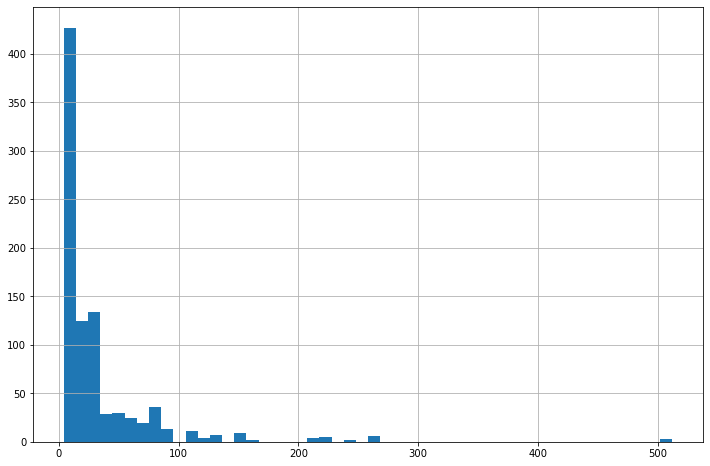

In [24]:
df_train['Fare'].hist(bins=50, figsize=(12, 8))
plt.show()

Due to the disparity of the fare this notebook will create **FareGroup** feature as classified as:

0-40 -> Low(1)

41-100 -> Mid(2)

101-200 -> High(3)

201-500+ -> V.High(4)

In [25]:
df_train['FareGroup'] = pd.cut(df_train['Fare'], bins = [0, 41, 101, 201, np.inf], labels=[1, 2, 3, 4])
df_test['FareGroup'] = pd.cut(df_test['Fare'], bins = [0, 41, 101, 201, np.inf], labels=[1, 2, 3, 4])
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Youth,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Youth,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Youth,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Youth,1


8. **Embarked**

In [26]:
df_train[df_train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareGroup
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Adult,2
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Senior,2


In [27]:
# Finding the common Embarkment point for the Pclass 1 for the missing values
df_train[(df_train['Pclass'] == 1)]['Embarked'].mode()

0    S
dtype: object

In [28]:
df_train['Embarked'].fillna(value='S', inplace=True)

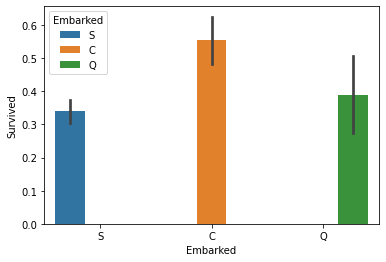

In [29]:
sns.barplot(data=df_train, x='Embarked', y='Survived', hue='Embarked')
plt.show()

**Observations**

Passengers who embarked at Cherbourg had a high likelihood of survival with those at Southampton having the lowest of the three embarkment points.

9. **Name**

In [30]:
# Funtion to take the dataframe and feature, pick the title and return a list of the titles
def titling(X, attrib):
    titles = []
    for i in range(len(X)):
        titles.append(str(df_train[attrib][i]).split('.')[0].split(',')[1].strip(' '))
    
    return titles

In [31]:
df_train['Title'] = titling(df_train, 'Name')
df_test['Title'] = titling(df_test, 'Name')
df_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

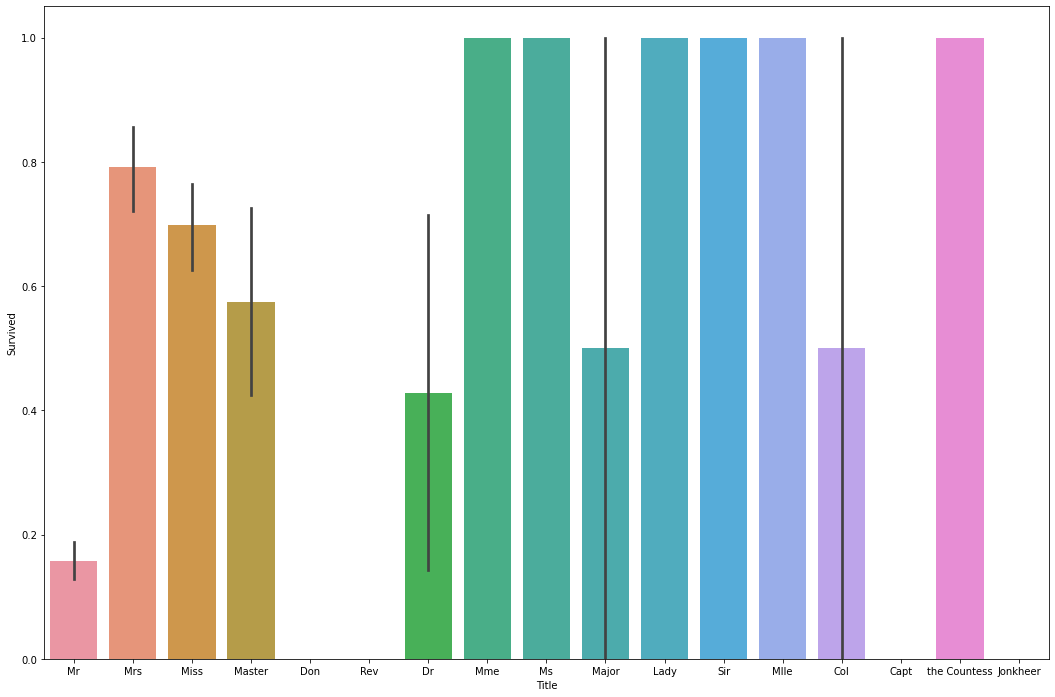

In [32]:
plt.figure(figsize=(18, 12))
g = sns.barplot(data=df_train, x='Title', y='Survived')
# g.set_xticklabels(labels = rotation=90)
plt.show()

**Observations**

From the plot above there is a classification of title and their survival rate. Royal titles had a good survival rate. Common titles had a fair chance of survival and lowest level had the poorest chance in survival.

Classes for the titles will be:

[Master, Major, Lady, Sir, Col, the Countess] -> Royal(1)

[Mr, Mrs, Miss, Dr, Mme, Ms, Mlle] -> Common(2)

[Don, Rev, Capt, Jonkheer] -> Low(3)

This notebook will use label encoding.

In [33]:
def tilgrouping(X, attrib):
    royal = ['Master', 'Major', 'Lady', 'Sir', 'Col', 'the Countess']
    common = ['Mr', 'Mrs', 'Miss', 'Dr', 'Mme', 'Ms', 'Mlle']
    low = ['Don', 'Rev', 'Capt', 'Jonkheer']
    
    titleg = []
    
    for i in range(len(X[attrib])):
        if (X[attrib][i]) in royal:
            titleg.append(1)
        elif (X[attrib][i]) in common:
            titleg.append(2)
        elif (X[attrib][i]) in low:
            titleg.append(3)
    
    return titleg

In [34]:
df_train['TitleGroup'] = tilgrouping(df_train, 'Title')
df_test['TitleGroup'] = tilgrouping(df_test, 'Title')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareGroup,Title,TitleGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Youth,1,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,2,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Youth,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Youth,2,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Youth,1,Mr,2


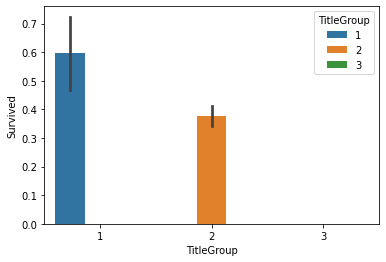

In [35]:
sns.barplot(data=df_train, x='TitleGroup', y='Survived', hue='TitleGroup')
plt.show()

**Observations**

1. Class 1 which is royal has the higest chance at survival with:
2. class 3 with the lowest chance at survival

10. **Family Size and Family Type**

The Family Size and Family type are features engineered from _SibSp_ and _Parch_ features which singly have different effects on survival and this notebook wants to explore if they are combine what their effect is.

In [36]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareGroup,Title,TitleGroup,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Youth,1,Mr,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,2,Mrs,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Youth,1,Miss,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Youth,2,Mrs,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Youth,1,Mr,2,0


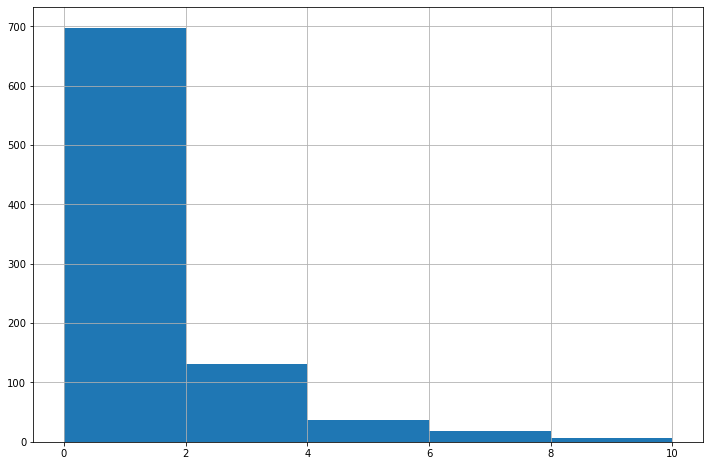

In [37]:
df_train['FamilySize'].hist(bins =5, figsize=(12, 8))
plt.show()

In [38]:
df_train['FamilyType'] = pd.cut(df_train['FamilySize'], bins=[-1, 0.5, 4, np.inf], labels=['Alone', 'Small', 'Big'])
df_test['FamilyType'] = pd.cut(df_test['FamilySize'], bins=[-1, 0.5, 4, np.inf], labels=['Alone', 'Small', 'Big'])

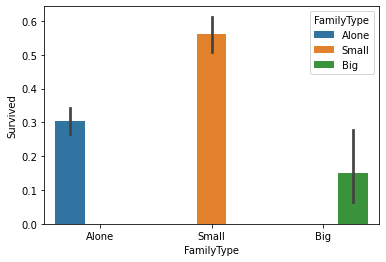

In [39]:
sns.barplot(data=df_train, x='FamilyType', y ='Survived', hue='FamilyType')
plt.show()

#### Creating a Clean Train, Validation and Test Data

Before delving into modelling, this notebook identifies the necessary features and transformations required. Then creates the train, validation and test datasets.

Required features: 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'AgeGroup', 'FareGroup', 'TitleGroup', 'FamilySize', 'FamilyType'

Features for Encoding: 'Sex', 'Embarked', 'AgeGroup', 'FamilyType'

###### **One-Hot Encoding**
1. Sex
2. Embarked
3. AgeGroup

###### **Label Encoding**
1. FamilyType

In [40]:
inputs = df_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'AgeGroup', 'FareGroup', 'TitleGroup', 'FamilySize', 'FamilyType']]
target = df_train[['Survived']]

inputs_test = df_test[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'AgeGroup', 'FareGroup', 'TitleGroup', 'FamilySize', 'FamilyType']]

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [42]:
le.fit(inputs['FamilyType'])
inputs['FamilyType'] = le.transform(inputs['FamilyType'])
inputs_test['FamilyType'] = le.transform(inputs_test['FamilyType'])

<ipython-input-42-8fd5226857cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs['FamilyType'] = le.transform(inputs['FamilyType'])
<ipython-input-42-8fd5226857cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs_test['FamilyType'] = le.transform(inputs_test['FamilyType'])


In [43]:
# One Hot Encoding
dummies_train = pd.get_dummies(inputs[['Sex', 'Embarked', 'AgeGroup']])
dummies_test = pd.get_dummies(inputs_test[['Sex', 'Embarked', 'AgeGroup']])

In [44]:
inputs1 = pd.concat([inputs, dummies_train], axis=1)
inputs_test1 = pd.concat([inputs_test, dummies_test], axis=1)
inputs1.shape, inputs_test1.shape

((891, 22), (418, 23))

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 

X_train, X_valid, y_train, y_valid = train_test_split(inputs1.drop(['Sex','Embarked', 'AgeGroup'], axis=1), target, test_size=0.3, random_state=42)

#### Testing Different Models

This notebook will try and test the following models:

1. Random Forest
2. LightGBM
3. SVC
4. KNN
5. AdaBoost

6. CatBoost

From the 6 the best will then be selected to be used to predict survival of passengers in the test dataset

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from lightgbm import LGBMClassifier

In [56]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean Score:', scores.mean())
    print('Std: ', scores.std())

1. KNN

In [68]:
knn_cls = KNeighborsClassifier()
scores_knn = cross_val_score(knn_cls, X_train, y_train.values.ravel(), scoring='accuracy', cv=10)

display_scores(scores_knn)

Scores:  [0.58730159 0.80952381 0.71428571 0.69354839 0.74193548 0.62903226
 0.74193548 0.67741935 0.69354839 0.67741935]
Mean Score: 0.6965949820788531
Std:  0.05868657848254691


2. SVC

In [70]:
svc_cls = SVC()

scores_svc = cross_val_score(svc_cls, X_train, y_train.values.ravel(), scoring='accuracy', cv=10)
display_scores(scores_svc)

Scores:  [0.68253968 0.6984127  0.71428571 0.69354839 0.62903226 0.61290323
 0.66129032 0.62903226 0.69354839 0.70967742]
Mean Score: 0.6724270353302612
Std:  0.03498972290996514


3. Random Forest

In [72]:
rf_cls = RandomForestClassifier()

scores_rf = cross_val_score(rf_cls, X_train, y_train.values.ravel(), scoring='accuracy', cv=10)
display_scores(scores_rf)

Scores:  [0.82539683 0.79365079 0.80952381 0.83870968 0.77419355 0.70967742
 0.79032258 0.80645161 0.80645161 0.85483871]
Mean Score: 0.8009216589861751
Std:  0.037781322560493553


4. LightGBM

In [77]:
lgb_cls = LGBMClassifier()

scores_lgb = cross_val_score(lgb_cls, X_train, y_train.values.ravel(), scoring='accuracy', cv=10)
display_scores(scores_lgb)

Scores:  [0.80952381 0.82539683 0.88888889 0.88709677 0.80645161 0.74193548
 0.82258065 0.79032258 0.77419355 0.90322581]
Mean Score: 0.8249615975422427
Std:  0.05032907727979229


5. AdaBoost

In [78]:
ada_cls = Ada()

scores_ada = cross_val_score(ada_cls, X_train, y_train.values.ravel(), scoring='accuracy', cv=10)
display_scores(scores_ada)

Scores:  [0.80952381 0.77777778 0.79365079 0.83870968 0.80645161 0.70967742
 0.80645161 0.83870968 0.80645161 0.85483871]
Mean Score: 0.8042242703533027
Std:  0.03838437020701616


6. CatBoost

In [79]:
X_train1, X_valid1, y_train1, y_valid1 = train_test_split(inputs, target, test_size=0.30, random_state=42)

cat_features = ['Sex', 'Embarked', 'AgeGroup', 'FareGroup']
cat_cls = CatBoostClassifier(iterations=2500, learning_rate=0.05, random_seed=42, cat_features=cat_features, verbose=False)

scores_cat = cross_val_score(cat_cls, X_train1, y_train1.values.ravel(), scoring='accuracy', cv=10)

In [80]:
display_scores(scores_cat)

Scores:  [0.79365079 0.82539683 0.88888889 0.87096774 0.77419355 0.74193548
 0.83870968 0.80645161 0.85483871 0.90322581]
Mean Score: 0.8298259088581668
Std:  0.048956605624214784


**Observation**

From little exploration, CatBoost performs the best with very high Test and Train Scores.
This notebook will explore a further exploration by means of hyperparameter tuning via GridSearch to select the best estimator with optimum parameters.

The selected algorithms for hyperparameter tuning are: Random Forest, AdaBoost, LightGBM, and CatBoost

#### Hyperparameter Tuning

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


# Random Forest param Grid
rf_param_grid = {
    'n_estimators': [100, 250, 400,],
    'criterion': ['gini', 'entropy'],
    "min_samples_split":[2,3,10],
    "min_samples_leaf":[1,3,10],
    'max_features': ['sqrt', 'log2'],
    'random_state':[8, 16, 42],
}

lgb_param_grid = {
    'boosting_type ':['gbdt', 'rf', 'goss'],
    'learning rate': [0.025, 0.05, 0.1, 0.2],
    'n_estimators': [100, 250, 400],
    'metric': ['auc', 'average_precision'],
    'random_state':[8, 16, 42],
}

ada_param_grid = {
    'n_estimators': [50, 100, 250],
    'learning_rate': [0.1, 0.5, 1, 1.5],
    'random_state':[8, 16, 42],
}

cat_param_grid = {
    'iterations': [1000, 1600, 2000, 2400],
    'learning_rate': [0.01, 0.03, 0.05],
    'random_state':[8, 16, 42],
}

classifier_param = [rf_param_grid, lgb_param_grid, ada_param_grid]

# Classifiers

classifier = [RandomForestClassifier(), LGBMClassifier(), AdaBoostClassifier()]

In [91]:
cv_result = []
best_estimators = []

for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], 
                       scoring='accuracy', n_jobs=-1, cv=StratifiedKFold(n_splits=10))
    clf.fit(X_train, y_train.values.ravel())
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)

In [102]:
clf2 = GridSearchCV(CatBoostClassifier(cat_features=cat_features, verbose=False), param_grid=cat_param_grid,
                    scoring='accuracy', n_jobs=-1, cv=StratifiedKFold(n_splits=10))
clf2.fit(X_train1, y_train1.values.ravel())
cv_result.append(clf2.best_score_)
best_estimators.append(clf2.best_estimator_)

In [111]:
result = pd.DataFrame({'Mean Score': cv_result, 'Model': ['Random Forest', 'LightGBM', 'AdaBoost', 'CatBoost', 'CatBoost']})

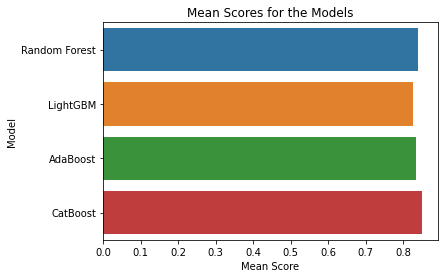

In [120]:
g = sns.barplot(data=result, x='Mean Score', y='Model')
g.set_xlabel('Mean Score')
g.set_title('Mean Scores for the Models')
plt.show()

<bound method BaseEstimator.set_params of GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1, 1.5],
                         'n_estimators': [50, 100, 250],
                         'random_state': [8, 16, 42]},
             scoring='accuracy')>

In [135]:
rf_model = best_estimators[0]
lgb_model= best_estimators[1]
ada_model = best_estimators[2]
cat_model = best_estimators[3]

#### Validate the Models

In [144]:
rf_preds = rf_model.predict(X_valid)
lgb_preds = lgb_model.predict(X_valid)
ada_preds = ada_model.predict(X_valid)
cat_preds = cat_model.predict(X_valid1)

rf_acc = accuracy_score(y_valid.values.ravel(), rf_preds)
lgb_acc = accuracy_score(y_valid.values.ravel(), lgb_preds)
ada_acc = accuracy_score(y_valid.values.ravel(), ada_preds)
cat_acc = accuracy_score(y_valid1.values.ravel(), cat_preds)

print(f'Accuracies -> Random Forest: {rf_acc}, LightGBM: {lgb_acc}, AdaBoost: {ada_acc}, CatBoost:{cat_acc}')

Accuracies -> Random Forest: 0.7835820895522388, LightGBM: 0.8246268656716418, AdaBoost: 0.8134328358208955, CatBoost:0.832089552238806


**Observation**
From the test accuracies(demonstrating prediction on unseen data) the models rank as follows:
1. CatBoost
2. LightGBM
3. AdaBoost
4. Random Forest

####  Predict Survival of the Passengers in the Test Data

In [179]:
X_train1.shape

(623, 12)

In [183]:
inputs_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    object  
 3   Age          418 non-null    float64 
 4   SibSp        418 non-null    int64   
 5   Parch        418 non-null    int64   
 6   Fare         417 non-null    float64 
 7   Embarked     418 non-null    object  
 8   AgeGroup     418 non-null    category
 9   FareGroup    417 non-null    category
 10  TitleGroup   418 non-null    int64   
 11  FamilySize   418 non-null    int64   
 12  FamilyType   418 non-null    int64   
dtypes: category(2), float64(2), int64(7), object(2)
memory usage: 37.3+ KB


In [186]:
inputs_test[['Fare', 'Pclass']][inputs_test['Fare'].isna()]

,Fare,Pclass
152,NaN,3


In [187]:
pclass3mean = inputs_test['Fare'][inputs_test['Pclass'] == 3].mean()
inputs_test['Fare'].fillna(pclass3mean, inplace=True)

/home/nyamwamu/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [188]:
inputs_test['FareGroup'] = pd.cut(inputs_test['Fare'], bins = [0, 41, 101, 201, np.inf], labels=[1, 2, 3, 4])

<ipython-input-188-fd19e536e296>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs_test['FareGroup'] = pd.cut(inputs_test['Fare'], bins = [0, 41, 101, 201, np.inf], labels=[1, 2, 3, 4])


In [189]:
X_test = inputs_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'AgeGroup', 'FareGroup', 'TitleGroup', 'FamilySize', 'FamilyType']]

In [190]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Pclass      418 non-null    int64   
 1   Sex         418 non-null    object  
 2   Age         418 non-null    float64 
 3   SibSp       418 non-null    int64   
 4   Parch       418 non-null    int64   
 5   Fare        418 non-null    float64 
 6   Embarked    418 non-null    object  
 7   AgeGroup    418 non-null    category
 8   FareGroup   418 non-null    category
 9   TitleGroup  418 non-null    int64   
 10  FamilySize  418 non-null    int64   
 11  FamilyType  418 non-null    int64   
dtypes: category(2), float64(2), int64(6), object(2)
memory usage: 34.0+ KB


In [191]:
test_preds = cat_model.predict(X_test)

In [194]:
survival_results = pd.concat([inputs_test['PassengerId'], pd.Series(test_preds, name='Survived')], axis=1)

In [196]:
survival_results.to_csv('survived_submission.csv', index=False)